In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [13]:
# 1.数据展示：了解数据，可以是csv读取，也可以直接copy进来
years = np.arange(2009,2020)
sales = np.array([0.52, 9.36, 33.6, 132, 352, 571, 912, 1207, 1682, 2135, 2684])

In [16]:
# 2. 初步判断：多项式回归(3阶)
'''
y = a*x^3 + b*x^2 + c*x + d
1: 1 1 1
2: 8 4 2
3: 27 9 3
...
'''

'\ny = a*x^3 + b*x^2 + c*x + d\n1: 1 1 1\n2: 8 4 2\n3: 27 9 3\n...\n'

In [14]:
# 3. 数据预处理：准备x，y对应的值，方便后续建模并计算系数、截距
model_y = sales
model_x = (years - 2008).reshape(-1, 1)
# 特征矩阵包含了立方项、平方项以及原始的距离值，作为多项式回归模型的输入特征矩阵。
model_x = np.concatenate([model_x ** 3,model_x ** 2 ,model_x],axis=1)

In [9]:
# 4.创建回归模型(多项式 一元三次)
model = LinearRegression()

In [15]:
# 5.模型训练
model.fit(model_x,model_y)

LinearRegression()

In [18]:
# 6.获取系数，截距
print('系数：', model.coef_)
print('截距：', model.intercept_)

系数： [  -0.20964258   34.42433566 -117.85390054]
截距： 90.12060606060629


In [22]:
# 7. 添加趋势线：想象成画折线图，x:1~11,12 y:带入公式之后得到的
trend_x = np.linspace(1,12,100)
fun = lambda x: -0.20964258 * x ** 3 + 34.42433566 * x ** 2 + -117.85390054 * x + 90.12060606060629
trend_y = fun(trend_x)

2020年销售额预测： 3270.7157563806063


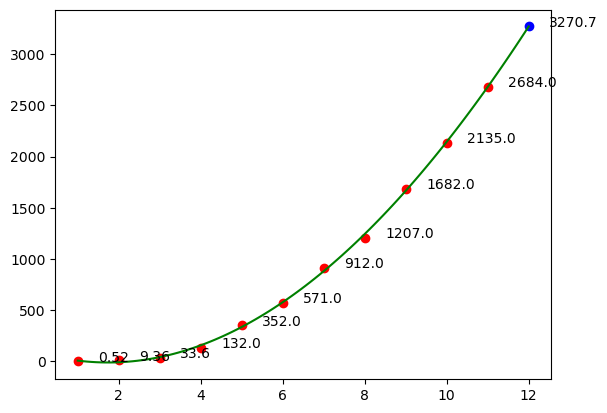

In [27]:
# 8. 预测2020年的销售额
print('2020年销售额预测：', fun(12))
years_no = years - 2008
plt.scatter(years_no,sales,c='red')
plt.scatter(12, fun(12), c='blue')
plt.plot(trend_x, trend_y, c='green')
# 加数据标签
plt.annotate(round(fun(12), 1), xy=(12, fun(12)),xytext=(12 + 0.5, fun(12) - 0.5))
for i in range(11):
    plt.annotate(sales[i], xy=(years_no[i], sales[i]), xytext=(years_no[i] + 0.5, sales[i] - 0.5))
plt.show()